# WeatherPy
----

### Analysis
* Of the cities tested, cities positioned at 0 degrees latitude experienced a smaller range of humidity than other cities, with a humidity no lower than 45%.

* Far more cities experienced 0% cloudiness as opposed to 100% cloudiness, outnumbering the latter by the dozens.

* Wind speeds cluster between 0 and 10 mph, regardless of location.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from ratelimit import limits

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#components of api endpoint(s)
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + api_keys.api_key

#creates variable for response code then prints response code to the console
response = requests.get(url + unit + api).json()
print(response)

#creates dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

#decorator that limits "call_api" function to 60 api calls per minute
@limits(calls=60, period=MINUTE)
def call_api():
    
    #a loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()

{'cod': '400', 'message': 'Nothing to geocode'}
Processing city 0: Mataura
Processing city 1: Vaini
Processing city 2: Carutapera
Processing city 3: Puerto Ayora
Processing city 4: Kapaa
Incomplete record. Skipping city instance...
Incomplete record. Skipping city instance...
Processing city 7: Faya
Processing city 8: Hermanus
Processing city 9: Prestea
Processing city 10: Albany
Processing city 11: Castro
Processing city 12: Lebu
Processing city 13: Tarko-Sale
Incomplete record. Skipping city instance...
Processing city 15: Dikson
Processing city 16: Sioux Lookout
Processing city 17: Luderitz
Processing city 18: Hobart
Processing city 19: Xining
Processing city 20: Busselton
Processing city 21: Punta Arenas
Processing city 22: New Norfolk
Processing city 23: Cape Town
Incomplete record. Skipping city instance...
Processing city 25: Cayenne
Processing city 26: Rikitea
Processing city 27: Lagoa
Processing city 28: Isangel
Processing city 29: Pisco
Processing city 30: Georgetown
Processi

Processing city 259: Barra
Processing city 260: Xinyu
Processing city 261: Tabuk
Processing city 262: Matara
Processing city 263: Trairi
Processing city 264: Ipubi
Processing city 265: Komatsu
Processing city 266: Mosquera
Processing city 267: Ambulu
Processing city 268: Pacific Grove
Processing city 269: Tuktoyaktuk
Processing city 270: Bilibino
Processing city 271: Lagos
Processing city 272: Puerto Maldonado
Processing city 273: Makasar
Processing city 274: Sidmouth
Processing city 275: Aginskoye
Processing city 276: Butaritari
Processing city 277: Aksu
Incomplete record. Skipping city instance...
Processing city 279: Tiksi
Processing city 280: Alice Springs
Processing city 281: Cockburn Town
Processing city 282: Cherskiy
Processing city 283: Varhaug
Incomplete record. Skipping city instance...
Processing city 285: Sovetskiy
Processing city 286: Lasa
Processing city 287: Sungaipenuh
Processing city 288: Sur
Processing city 289: Jijiga
Processing city 290: Rio Gallegos
Processing city

Processing city 515: Lorengau
Processing city 516: Puerto Escondido
Processing city 517: Leshukonskoye
Incomplete record. Skipping city instance...
Processing city 519: Port Lincoln
Processing city 520: Hervey Bay
Processing city 521: Meulaboh
Processing city 522: Kondinskoye
Processing city 523: Taft
Processing city 524: Salinopolis
Processing city 525: Katete
Incomplete record. Skipping city instance...
Processing city 527: Molchanovo
Incomplete record. Skipping city instance...
Processing city 529: Umm Lajj
Processing city 530: Pitea
Incomplete record. Skipping city instance...
Processing city 532: Lalpur
Processing city 533: Point Pleasant
Processing city 534: Jacmel
Processing city 535: Okahandja
Processing city 536: Xiongzhou
Processing city 537: Ojinaga
Processing city 538: Mamallapuram
Processing city 539: Kamenka
Processing city 540: Ust-Nera
Processing city 541: Peru
Processing city 542: Samarai
Processing city 543: Brae
Processing city 544: Mount Isa
Processing city 545: Chi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#creates table/DataFrame from the "city_data" dictionary
city_data_df = pd.DataFrame(city_data)

#exports DataFrame as a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")

#previews table/DataFrame
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,74,80,17.00,NZ,1554087007
1,Vaini,15.34,74.49,71.60,88,0,3.36,IN,1554084000
2,Carutapera,-1.20,-46.02,77.15,100,92,5.64,BR,1554087005
3,Puerto Ayora,-0.74,-90.35,79.00,92,0,6.98,EC,1554086766
4,Kapaa,22.08,-159.32,80.60,54,20,19.46,US,1554087195
5,Faya,18.39,42.45,60.80,71,0,11.41,SA,1554084000
6,Hermanus,-34.42,19.24,57.00,66,44,3.00,ZA,1554086794
7,Prestea,5.43,-2.14,75.98,95,0,2.39,GH,1554087243
8,Albany,42.65,-73.75,37.40,64,90,18.34,US,1554087199
9,Castro,-42.48,-73.76,51.80,100,90,4.70,CL,1554084000


In [5]:
#creates variables for relevant table columns
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

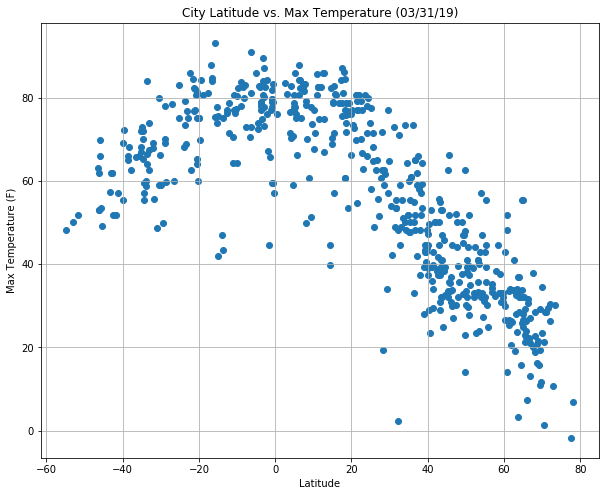

In [6]:
#establishes size for the next visualization/graph
plt.figure(figsize=(10,8))

#establishes type, data, and configuration for visualization/graph
plt.scatter(lat, max_temp, linewidths=1, marker="o")

#creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#exports graph as a png image file (steps are repeated for the rest of the script...)
plt.savefig("Fig1.png")

#### Latitude vs. Humidity Plot

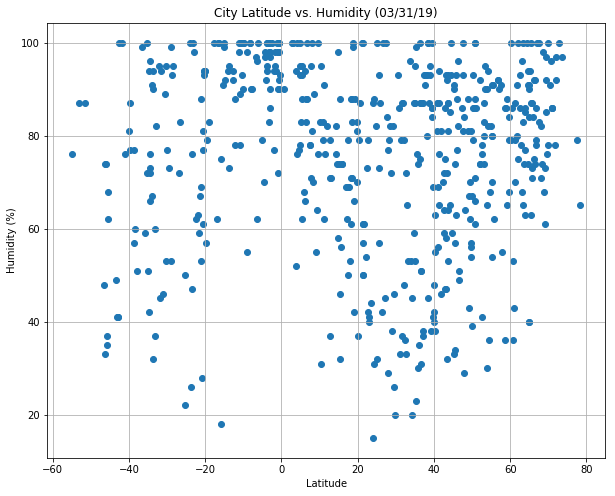

In [7]:
#(...)
plt.figure(figsize=(10,8))

plt.scatter(lat, humidity, linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Fig2.png")

#### Latitude vs. Cloudiness Plot

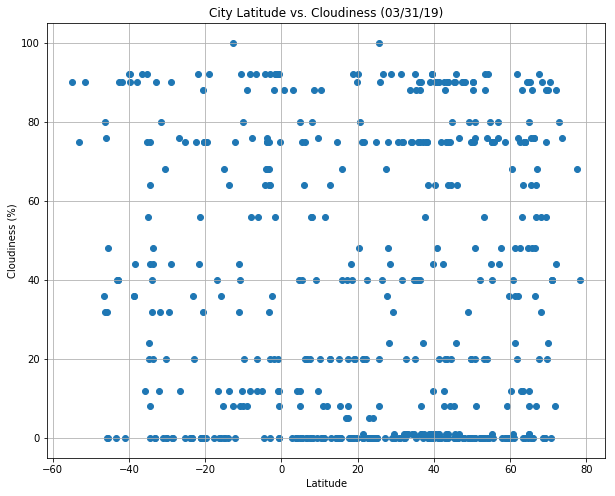

In [8]:
#(...)
plt.figure(figsize=(10,8))

plt.scatter(lat, cloudiness, linewidths=1, marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Fig3.png")

#### Latitude vs. Wind Speed Plot

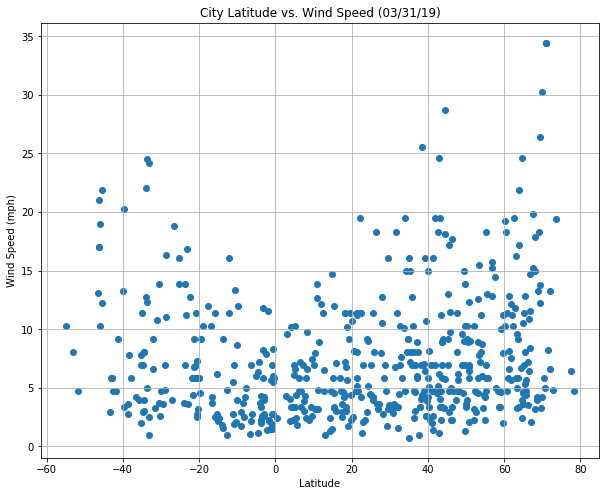

In [9]:
#(...)
plt.figure(figsize=(10,8))

plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Fig4.png")